# Machine Learning Workflow: Batch Processing

Let us climb up to our learning curve by understanding the impact of batch processing to the ML workflow. Recall that in the previous laboratory notebook, we train our model at once on the training set. In reality, if you have a very large dataset, you need to employ batch processing. The training set is being divided into batches. The illustration below shows the changes of the ML workflow, applying the batch processing concept.

By the end of this laboratory notebook, you will be able to **apply batch processing in any ML classification task.**




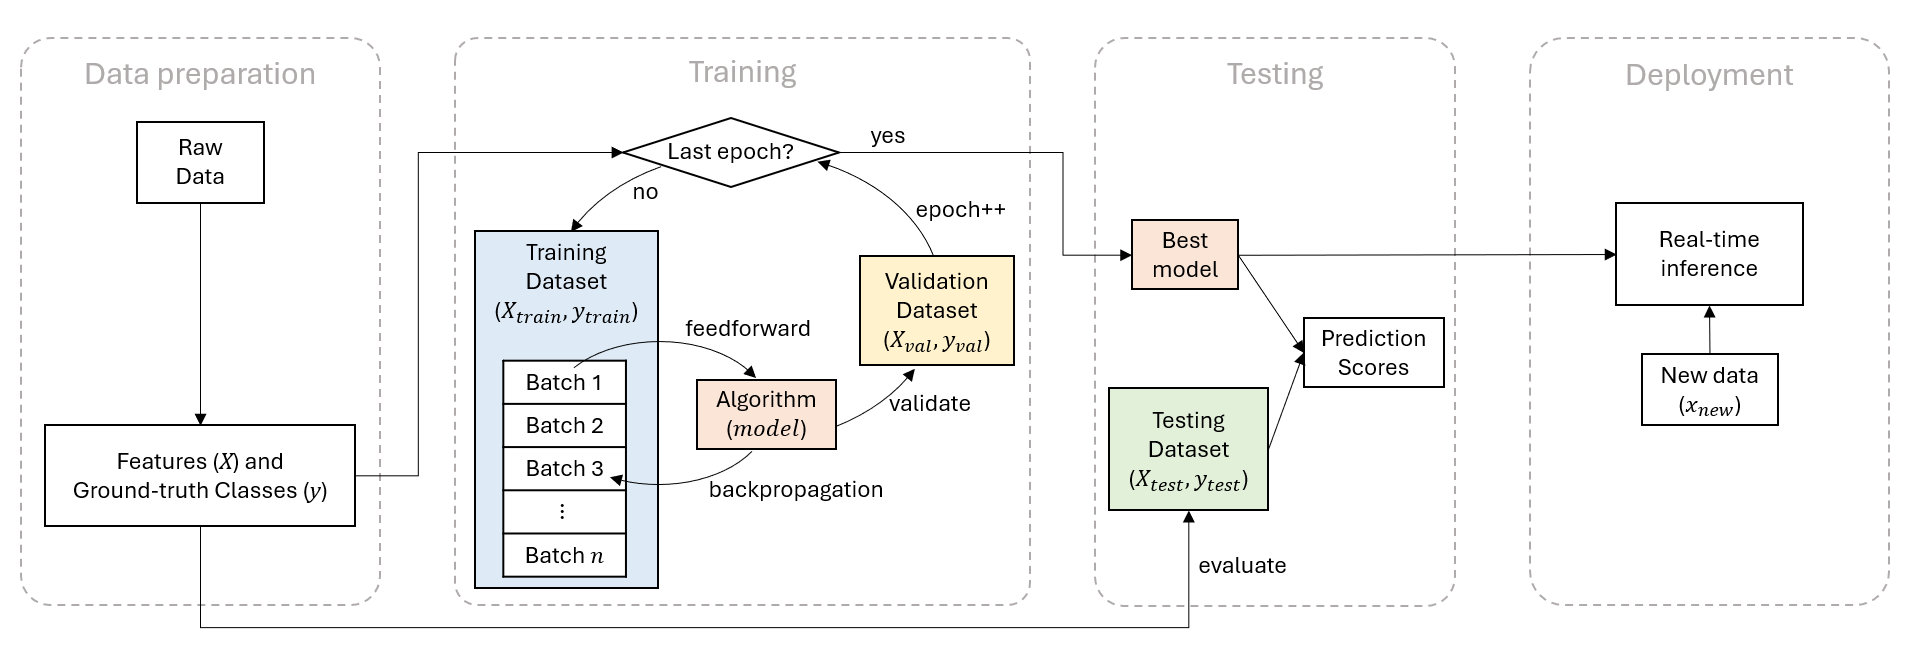

## 1. Data Preparation
We will use again the MNIST dataset as our `raw data`.





Recall that you can download the `mnist_digits.csv` from this [GDrive](https://drive.google.com/file/d/1eAmVYcpRvkYM7MXb7vTu95zQjWjS1iet/view?usp=sharing).

In [29]:
import pandas as pd

try: # if csv file is already in Colab, then load
  raw_data = pd.read_csv("C:/Users/DWIGHT LANCE JUMAOAS/don't open this/emerging_technology/emerging-technologies-main/activities/machine_learning_samples/mnist_digits.csv")
  print("Loaded mnist_digits.csv into a DataFrame.")
except FileNotFoundError: # otherwise, allow user to upload the CSV file
  uploaded = files.upload()
  for filename in uploaded.keys():
      raw_data = pd.read_csv(filename)
      print(f"Loaded {filename} into a DataFrame.")

Loaded mnist_digits.csv into a DataFrame.


There will be no changes when preparing the dataset. So, our next move is to determine the `features` and `ground-truth classes`. Once again, we will represent the array of features as the `X` variable, while the ground-truth classes (or the targets) as the `y` variable.

In [30]:
X = raw_data.iloc[:, :-1]
y = raw_data.iloc[:, -1]

Likewise we will perform data splitting: 70% training, 15% validation, and 15% testing.


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_others, y_train, y_others = train_test_split(
    X, # features
    y, # targets
    train_size=0.7, # 70% training set
    stratify=y, # split according to even distribution of targets
    shuffle=True
)

X_val, X_test, y_val, y_test = train_test_split(
    X_others, # features
    y_others, # targets
    test_size = 0.5, # 15% = 0.5 of 30%
    stratify=y_others, # split according to even distribution of targets
    shuffle=True
)

Alright! So now, you need to remember that:


1.   `X_train` and `y_train` correspond to the features and targets in the training set.
2.   `X_val` and `y_val` correspond to the features and targets in the validation set.
3.   `X_test` and `y_test` correspond to the features and targets in the training set.



## 2. Training

In this laboratory notebook,we will utilize again the same algorithm, which is the ANN-MLP. We also retain the number of hidden layers and the number of hidden nodes. However, we introduce two new things:


1.   Epoch and batch size
2.   Categorical cross-entropy loss




In [32]:

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    hidden_layer_sizes=(80, 40), # means 16 nodes at 1st hidden layer and 8 nodes at 2nd hidden layer
    warm_start=False # set to retain weights between fits
)
     

Before we go for training, we need to learn first what are `epoch` and `batch size`.


*   `epoch`: refers to one complete pass through the entire training dataset.
*   `batch_size`: defines the number of samples that are used to update the model's parameters at each step during training.



In [33]:
epochs = 100
batch_size = 64

Since we will try to learn by batch size, let us create a function that create batches.

In [34]:
def get_batches(X, y, batch_size):
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i + batch_size]
        y_batch = y[i:i + batch_size]
        yield X_batch, y_batch

Also since what we want to do is a multiclass classification, we need to use the `categorical cross-entropy loss`. It is mathematically defined as:

$ Loss = - \sum^{N}_{i=1} \sum^{C}_{c=1} y_{ic} log(p_{ic})$

where,
* $C$ is the number of classes (here, is 10)
* $y_{ic}$ is the binary indicator (0 or 1) if class label $c$ is the correct classification for observation $i$
* $p_{ic}$ is the predicted probability of observation $i$ being of class $c$

But, no need to worry! Because we can call `log_loss` from scikit-learn to compute this value.

In [35]:
from sklearn.metrics import log_loss

Now, we begin the training of the model over multiple epochs with batch processing.

In [36]:
import numpy as np

history = {'train_losses':[], 'val_losses':[], 'best_model':None, 'best_epoch':0}
classes = np.unique(y)

for epoch in range(epochs):
    # Train the model in batches
    for X_batch, y_batch in get_batches(X_train, y_train, batch_size):
      model.partial_fit(X_batch, y_batch, classes=classes)

    # Calculate training loss
    y_train_proba = model.predict_proba(X_train)
    train_loss = log_loss(y_train, y_train_proba)

    # Calculate validation loss
    y_val_proba = model.predict_proba(X_val)
    val_loss = log_loss(y_val, y_val_proba)
    print(f"Epoch {epoch+1}/{epochs}: train_loss={train_loss:.4f}, val_loss={val_loss:.4f}")

    # save model only at best validation loss
    if (history['best_model'] is None) or (val_loss < history['val_losses'][-1]):
      history['best_model'], history['best_epoch'] = model, epoch
    # save losses
    history['train_losses'].append(train_loss)
    history['val_losses'].append(val_loss)


Epoch 1/100: train_loss=1.8239, val_loss=1.8885
Epoch 2/100: train_loss=0.8925, val_loss=0.8787
Epoch 3/100: train_loss=0.5338, val_loss=0.5018
Epoch 4/100: train_loss=0.3501, val_loss=0.3244
Epoch 5/100: train_loss=0.2538, val_loss=0.2351
Epoch 6/100: train_loss=0.1992, val_loss=0.1853
Epoch 7/100: train_loss=0.1606, val_loss=0.1494
Epoch 8/100: train_loss=0.1329, val_loss=0.1267
Epoch 9/100: train_loss=0.1121, val_loss=0.1104
Epoch 10/100: train_loss=0.0953, val_loss=0.0959
Epoch 11/100: train_loss=0.0817, val_loss=0.0866
Epoch 12/100: train_loss=0.0711, val_loss=0.0802
Epoch 13/100: train_loss=0.0622, val_loss=0.0747
Epoch 14/100: train_loss=0.0548, val_loss=0.0698
Epoch 15/100: train_loss=0.0485, val_loss=0.0652
Epoch 16/100: train_loss=0.0434, val_loss=0.0626
Epoch 17/100: train_loss=0.0386, val_loss=0.0592
Epoch 18/100: train_loss=0.0346, val_loss=0.0574
Epoch 19/100: train_loss=0.0311, val_loss=0.0545
Epoch 20/100: train_loss=0.0280, val_loss=0.0534
Epoch 21/100: train_loss=0.02

Let us try to observe the trend of the training and validation losses. Going down together is better!

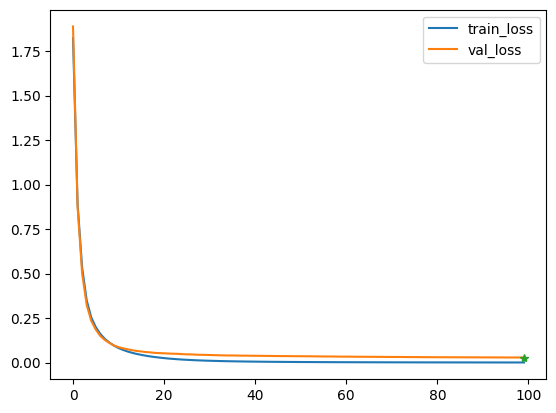

In [37]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), history['train_losses'], label='train_loss')
plt.plot(range(epochs), history['val_losses'], label='val_loss')
plt.plot(history['best_epoch'], history['val_losses'][history['best_epoch']], marker='*')
plt.legend()
plt.show()

**Warning**: The common mistake with programmers is that they forgot to save the model at the best validation loss (minimum val_loss). The `history` variable tracks the best model.

Now, let us try to validate our model using the validation set. Notice that we use the `X_val` and `y_val`.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        27
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        26
           9       1.00      0.96      0.98        27

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



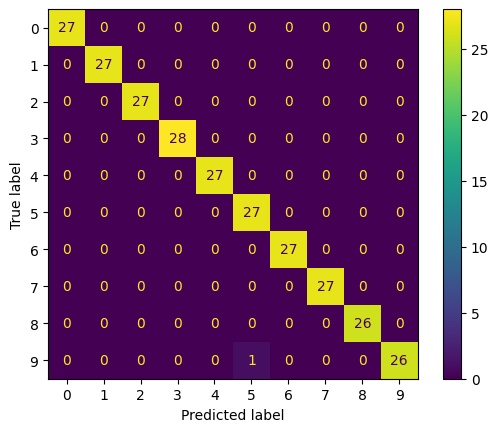

In [38]:
from sklearn import metrics

best_model = history['best_model']
y_val_pred = best_model.predict(X_val)
print(f"{metrics.classification_report(y_val, y_val_pred)}")
metrics.ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)

## 3. Testing

Let us evaluate our best model using the testing set `X_test` and `y_test`.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        28
           6       1.00      0.96      0.98        27
           7       1.00      1.00      1.00        27
           8       0.96      0.92      0.94        26
           9       1.00      1.00      1.00        27

    accuracy                           0.99       270
   macro avg       0.99      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270



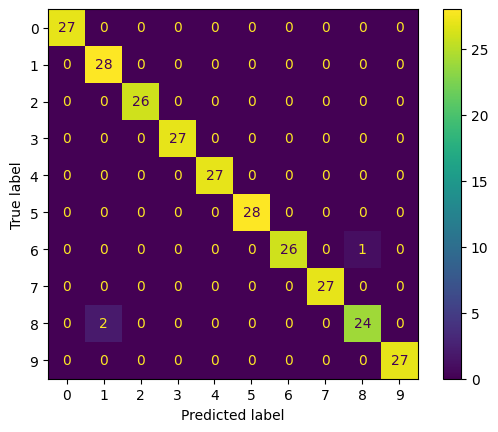

In [39]:
y_test_pred = best_model.predict(X_test)
print(f"{metrics.classification_report(y_test, y_test_pred)}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

Note: Do not forget to save your model offline.

In [40]:
import joblib

joblib.dump(best_model, 'mlp_model_e3.pkl')

['mlp_model_e3.pkl']

## 4. Deployment

When deploying your system, you are not required to re-run the training, but you just need to run feedforward prediction using the saved model.

In [41]:
loaded_model = joblib.load('mlp_model_e3.pkl')

x_new = [
    0,  0,  0,  5,  9,  0,  0,  0,
    0,  0,  2, 14, 14, 22,  0,  0,
    0,  0,  6, 14, 11,  9,  0,  0,
    0,  3, 15,  3, 11,  5,  0,  0,
    0,  8, 11,  0, 13,  6,  2,  0,
    6, 10, 16, 16, 12, 15, 17,  0,
    0,  0,  4, 10, 15,  3,  0,  0,
    0,  0,  0, 11, 13,  2,  0,  0
]

y_new_pred = loaded_model.predict([x_new])
print(f"Predicted digit = {y_new_pred[0]}")

Predicted digit = 4


c:\Users\DWIGHT LANCE JUMAOAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


**Challenge**: Try to run this [Python script](https://drive.google.com/file/d/1TkXU8jfWE03bb_N2AUL5_C9Y_vM1Kj7q/view?usp=drive_link) in offline mode, not here in Google Colab. Note that the file is the Python script from Laboratory 2. However, make sure to place both Python script and trained model (`mlp_model_e3.pkl`) in the same directory. Also, change the line that loads the model, overwrite with `mlp_model_e3.pkl`.

In [42]:
# End of laboratory notebook. Nothing follows ...